# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

### 載入 iris 資料集

In [151]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape, y.shape


((150, 4), (150,))

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

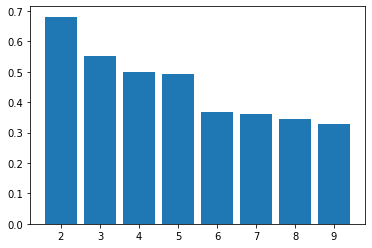

[0.6808136202713507, 0.5525919445213676, 0.49782569007544936, 0.49285559179751404, 0.36820569653764595, 0.3602333690388285, 0.3431042743826346, 0.32880158649306535]


In [152]:
#如何選擇 k
# 實務上我們讓程式幫忙選擇一個適合的 k，使得群間差異最大、群內差異最小
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt

# 迴圈
silhouette_avgs = []
ks = range(2, 10)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

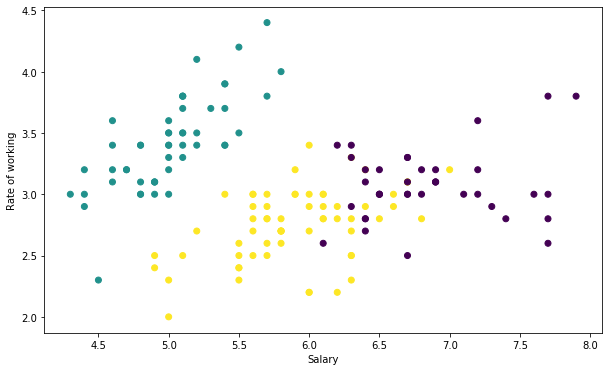

In [153]:
# 由績效圖我們發現 在2群、3群的績效比較好，因此我們可以將K設定為2 OR 3
km = KMeans(n_clusters=3)  #K=2群
y_pred = km.fit_predict(X)
plt.figure(figsize=(10, 6))
plt.xlabel('Salary')
plt.ylabel('Rate of working')
plt.scatter(X[:, 0], X[:, 1], c=y_pred) #C是第三維度 以顏色做維度
plt.show()

### K-means 資料建模 與訓練:

In [154]:
estimators = [('k_means_2', KMeans(n_clusters=2, n_init=2, init='k-means++')),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_5', KMeans(n_clusters=5, n_init=2, init='random'))
             ]

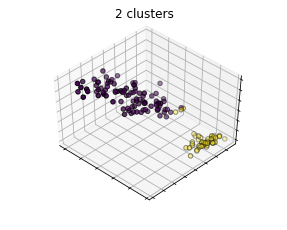

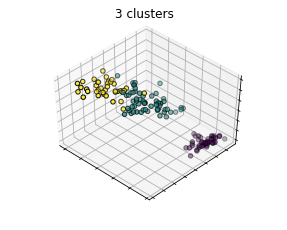

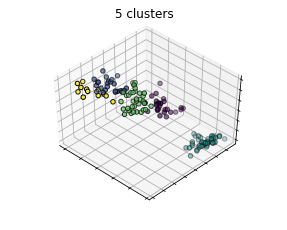

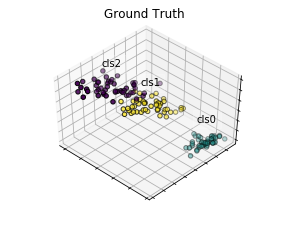

In [155]:
fignum = 1
titles = ['2 clusters', '3 clusters', '5 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float), edgecolor='k')
    #ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
#plt.show()

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12
plt.show()